In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os






CK dataset


In [39]:
rootpath="ck"

emotion_class=(os.listdir(rootpath))
print(emotion_class)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


In [40]:
for i in emotion_class:
    path=os.path.join(rootpath,i)
    num=len(os.listdir(path))
    print(f"{i} has {num} images")


anger has 135 images
contempt has 54 images
disgust has 177 images
fear has 75 images
happy has 207 images
sadness has 84 images
surprise has 249 images


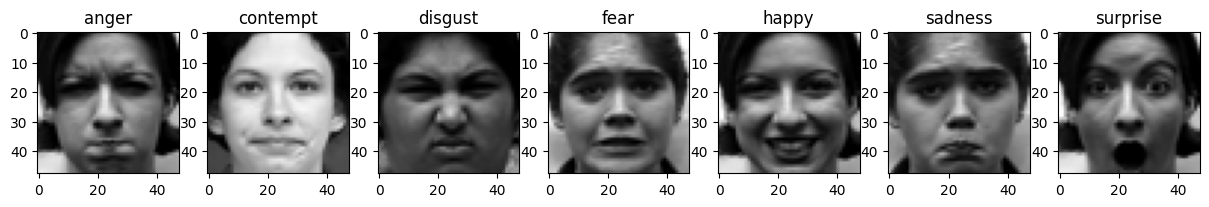

In [41]:
plt.figure(figsize=(15,5))

for i,emotion in enumerate(emotion_class):
    path=os.path.join(rootpath,emotion)
    imgfile=os.listdir(path)[0]
    imagepath=os.path.join(path,imgfile)

    img=cv.imread(imagepath)

    plt.subplot(1,len(emotion_class),i+1)
    plt.imshow(img)
    plt.title(emotion)
    
plt.show()

In [42]:
cnt={}

for i in emotion_class:
    path=os.path.join(rootpath,i)
    files=os.listdir(path)
    cnt[i]=len(files)
    

In [43]:
for emotion,count in cnt.items():
    print({emotion},{count})

{'anger'} {135}
{'contempt'} {54}
{'disgust'} {177}
{'fear'} {75}
{'happy'} {207}
{'sadness'} {84}
{'surprise'} {249}


Text(0, 0.5, 'Image count')

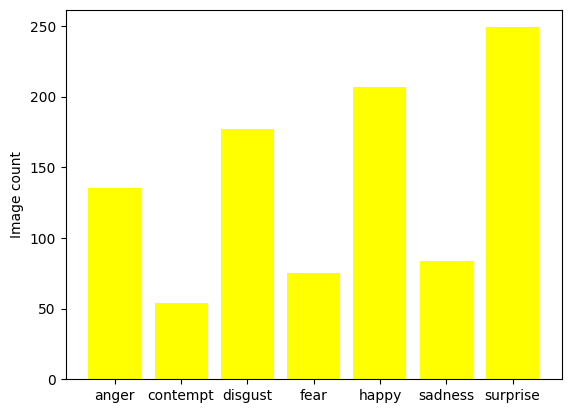

In [44]:

plt.bar(cnt.keys(),cnt.values(),color='yellow')
plt.ylabel('Image count')


In [45]:
width=[]
height=[]

for i in emotion_class:
    path=os.path.join(rootpath,i)
    files=os.listdir(path)
    
    for file in files:
        imgpath=os.path.join(path,file)
        img=cv.imread(imgpath,cv.IMREAD_GRAYSCALE)
        h,w=img.shape
        width.append(w)
        height.append(h)


In [46]:
print("Min width", min(width))
print("Max width",max(width))
print("Min height", min(height))
print("Max height",max(height))

Min width 48
Max width 48
Min height 48
Max height 48


FER-2013 dataset



Exploring 'train' dataset...

angry → 3995 images
disgust → 436 images
fear → 4097 images
happy → 7215 images
neutral → 4965 images
sad → 4830 images
surprise → 3171 images


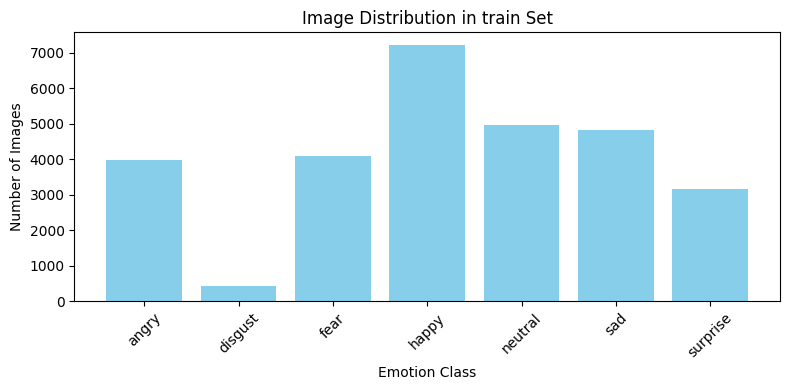

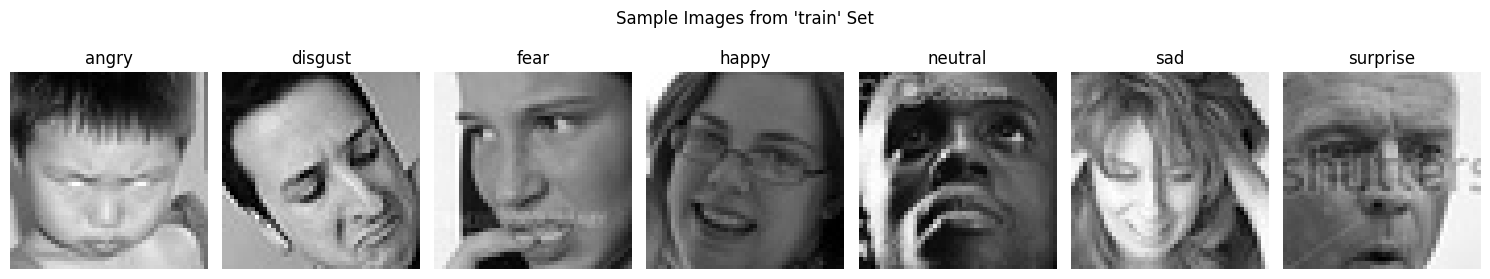


Exploring 'test' dataset...

angry → 958 images
disgust → 111 images
fear → 1024 images
happy → 1774 images
neutral → 1233 images
sad → 1247 images
surprise → 831 images


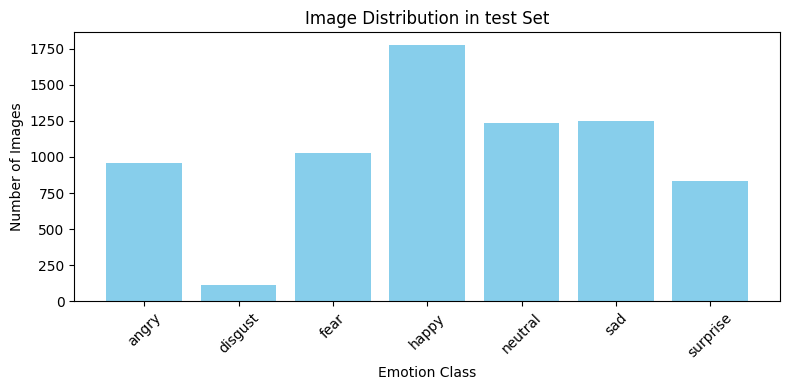

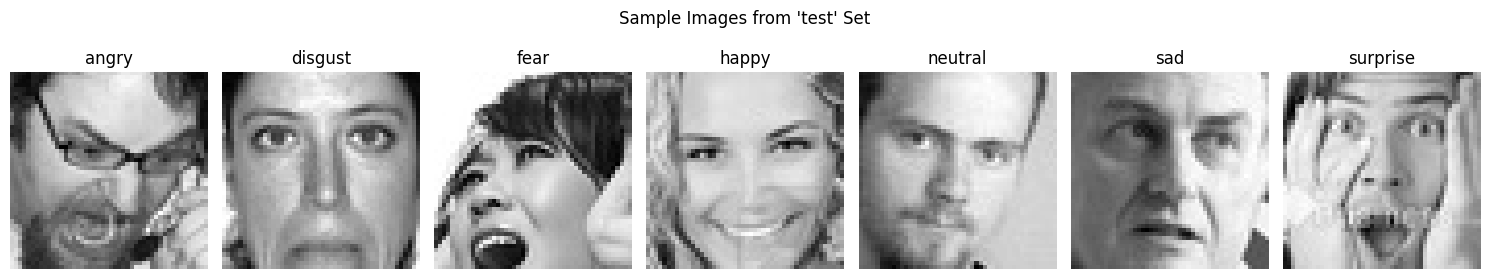

In [52]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

root_path = "FER-2013"  # Update this to match your actual folder name
datasets = ["train", "test"]

for dataset in datasets:
    print(f"\nExploring '{dataset}' dataset...\n")
    
    dpath = os.path.join(root_path, dataset)
    class_counts = {}

    if not os.path.exists(dpath):
        print(f"Path not found: {dpath}")
        continue

    # Count images per emotion class
    for emotion in os.listdir(dpath):
        emotion_path = os.path.join(dpath, emotion)
        if os.path.isdir(emotion_path):
            img_count = len(os.listdir(emotion_path))
            class_counts[emotion] = img_count
            print(f"{emotion} → {img_count} images")

    # Plot class distribution
    plt.figure(figsize=(8, 4))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title(f"Image Distribution in {dataset} Set")
    plt.xlabel("Emotion Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Show one sample image from each class
    plt.figure(figsize=(15, 3))
    for i, emotion in enumerate(class_counts.keys()):
        emotion_folder = os.path.join(dpath, emotion)
        image_file = os.listdir(emotion_folder)[0]  # Pick first image
        image_path = os.path.join(emotion_folder, image_file)
        img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        plt.subplot(1, len(class_counts), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(emotion)
        plt.axis('off')
    plt.suptitle(f"Sample Images from '{dataset}' Set")
    plt.tight_layout()
    plt.show()
